This Data Science project's goal is to conduct experiments with various metrics on e-commerce data.

I am going to use a dataset from *Shopify's 2022 Data Science Internship*.

Plan:
- EDA is performed on the original dataset: data description; detecting & treating outliers; Understanding relationships through plots;
- Heuristic metrics - CLV
- Gamma-Gamma & BG/NBD - CLV
- Customer Lifetime Value prediction and segmentation
- RFM Segmentation (Recency, Frequency, and Monetary)
- CLV Segments + RFM
- Recommendations (marketing tips for every customer segment)

**Customer Lifetime Value**

It is essential to know what each customer is worth to a business and understand the success rate of current strategies. CLV is a metric that grants knowledge and shows the amount of value a customer is expected to bring to a business over time.

CLV is a great asset and key to making financial forecasts and addressing any budget concerns. It gives an insight into many areas of a business and provides the knowledge to be projected onto future business decisions. 

**Heuristic metrics vs Gamma-Gamma & BG/NBD**

For E-Commerce CLV calculation we are going to use two methods:
- **Heuristic metrics** | Practical but suboptimal approach
- **Gamma-Gamma & BG/NBD** | Robust methodology with individual metrics and predictions

**RFM Segmentation**

RFM segmentation is a great method to identify groups of customers for special treatment. RFM analysis allows marketers to target specific clusters of customers with communications that are much more relevant for their particular behavior – and thus generate much higher rates of response, plus increased loyalty and customer lifetime value.

**Accomplished**:
- Calculated metrics: `Tenure`, `Average Order Value`, `Average Order Frequency`, `Average Customer Value`, `Average Customer Lifetime`, `Customer Lifetime Value`;
- List of customers that will purchase in the next period.
- Top 10 customers expected to make the most purchases in the next period (Week, Month, 6 Months).
- Top 10 most valuable customers by average transaction value
- CLV Customer Segmentation
- Average CLV (3 months) per Segment (A,B,C)
- RFM Segmentation (Scores and Labeling)
- CLV + RFM analysis
- Crosstab Results & Recommendations (marketing tips on targeting specific clusters of customers)
- Number of Customers and amount of CLV (3 months) in the Risk groups

# Data imports

In [1]:
#!pip install squarify

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import squarify

from datetime import datetime
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("Shopify_Data_Science_Challenge_Data_Set.csv")

# EDA

In [4]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
print(df.nunique())

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64


In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<AxesSubplot:xlabel='order_amount'>

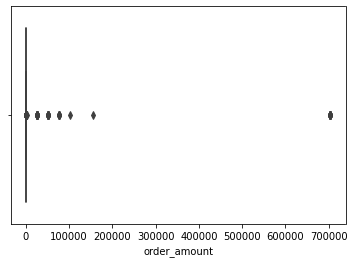

In [7]:
sns.boxplot(df['order_amount'])

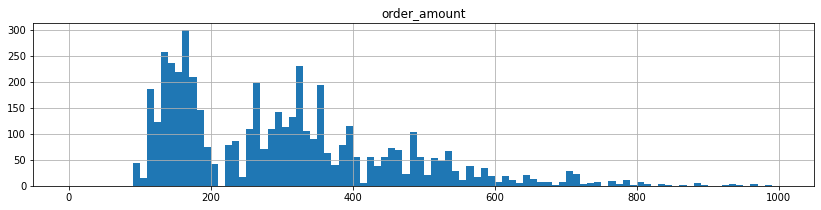

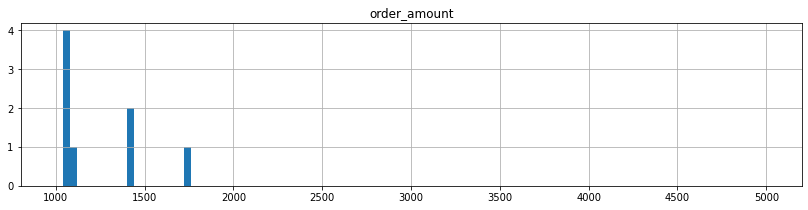

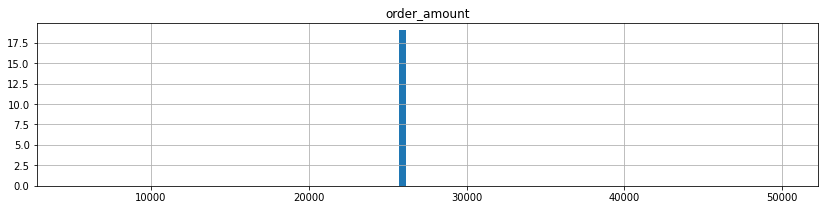

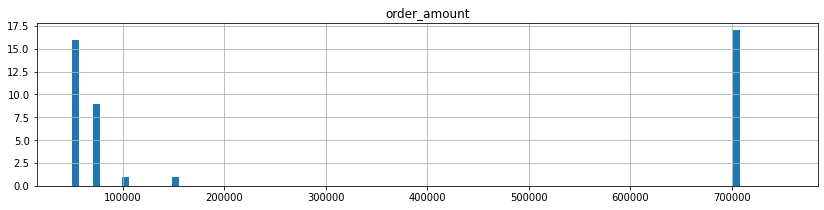

In [8]:
basket = 100
df.hist('order_amount', bins=basket, figsize=(14,3), range=(0, 1000));
df.hist('order_amount', bins=basket, figsize=(14,3), range=(1001, 5000));
df.hist('order_amount', bins=basket, figsize=(14,3), range=(5001, 50000));
df.hist('order_amount', bins=basket, figsize=(14,3), range=(50001, 750000));

In [9]:
df[(df['order_amount'] > 1400)].sort_values(by=['order_amount']).head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22
1364,1365,42,797,1760,5,cash,2017-03-10 6:28:21
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:43


In [10]:
df = df[(df['order_amount'] < 1800)]

In [11]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [12]:
df[(df['total_items'] > 7)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:18


All good! Outliers removed. Outliers were most probably B2B-customers.

<AxesSubplot:xlabel='order_amount'>

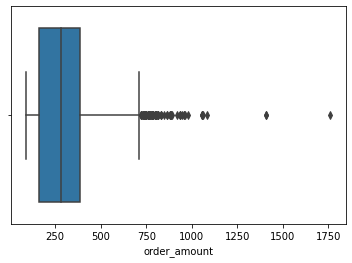

In [13]:
sns.boxplot(df['order_amount'])

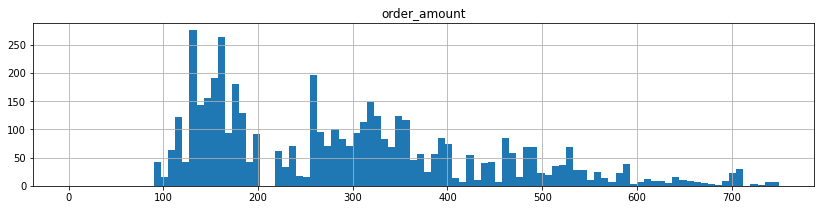

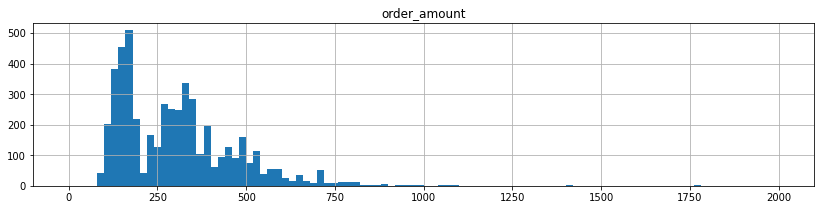

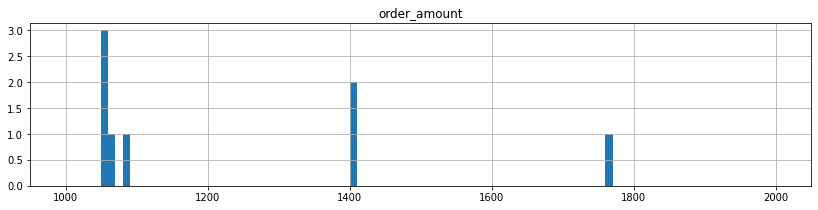

In [14]:
basket = 100
df.hist('order_amount', bins=basket, figsize=(14,3), range=(0, 750));
df.hist('order_amount', bins=basket, figsize=(14,3), range=(0, 2000));
df.hist('order_amount', bins=basket, figsize=(14,3), range=(1000, 2000));

# Heuristic metrics

### Orders df

Create an **orders dataframe**

We need to create an `orders` from our `df` dataframe using a Pandas groupby() with an agg() function. This gives us aggregated data on each order in the dataset.

In [15]:
orders = df.groupby('order_id').agg(
    shop_id=('shop_id', 'max'),
    user_id=('user_id', 'max'),
    order_date=('created_at', 'max'),
    revenue=('order_amount', 'sum'),
    items=('total_items', 'sum'),
    payment_method=('payment_method', 'max')
).reset_index()

In [16]:
orders.head()

,order_id,shop_id,user_id,order_date,revenue,items,payment_method
0,1,53,746,2017-03-13 12:36:56,224,2,cash
1,2,92,925,2017-03-03 17:38:52,90,1,cash
2,3,44,861,2017-03-14 4:23:56,144,1,cash
3,4,18,935,2017-03-26 12:43:37,156,1,credit_card
4,5,18,883,2017-03-01 4:35:11,156,1,credit_card


<AxesSubplot:xlabel='revenue'>

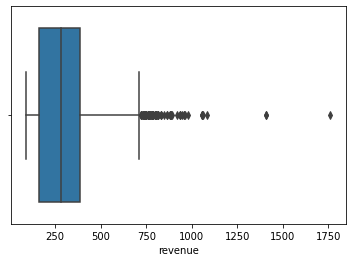

In [17]:
sns.boxplot(orders['revenue'])

In [18]:
orders['order_date'] = pd.to_datetime(orders['order_date']).dt.normalize()

In [19]:
orders

,order_id,shop_id,user_id,order_date,revenue,items,payment_method
0,1,53,746,2017-03-13,224,2,cash
1,2,92,925,2017-03-03,90,1,cash
2,3,44,861,2017-03-14,144,1,cash
3,4,18,935,2017-03-26,156,1,credit_card
4,5,18,883,2017-03-01,156,1,credit_card
...,...,...,...,...,...,...,...
4932,4996,73,993,2017-03-30,330,2,debit
4933,4997,48,789,2017-03-16,234,2,cash
4934,4998,56,867,2017-03-19,351,3,cash
4935,4999,60,825,2017-03-16,354,2,credit_card


### Customers df

Create a **customers dataframe**

Now we’ll repeat the process but will use groupby() and agg() to create a customers dataframe. We’ll calculate the date of each customer’s first and last order and store these. We’ll then calculate the tenure of each customer by return a time delta of the two dates.

In [20]:
customers = df.groupby('user_id').agg(
    revenue=('order_amount', 'sum'),
    shop_id=('shop_id', 'max'),
    orders=('order_id', 'nunique'),
    items=('total_items', 'sum'),
    first_order_date=('created_at', 'min'),
    last_order_date=('created_at', 'max')    
).reset_index().sort_values(by='revenue', ascending=False)

In [21]:
customers.head()

,user_id,revenue,shop_id,orders,items,first_order_date,last_order_date
18,718,8952,97,28,58,2017-03-01 0:47:54,2017-03-29 22:35:08
87,787,8532,97,24,54,2017-03-02 5:05:25,2017-03-29 22:43:20
168,868,8317,93,27,52,2017-03-01 18:33:33,2017-03-27 7:34:12
34,734,8200,99,24,52,2017-03-01 1:09:59,2017-03-30 11:34:52
147,847,8197,100,26,54,2017-03-01 11:32:33,2017-03-26 21:37:56


<AxesSubplot:xlabel='revenue'>

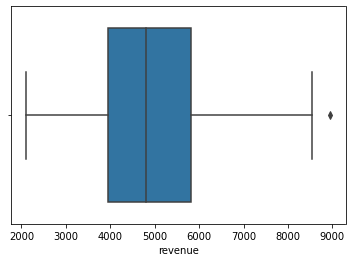

In [22]:
sns.boxplot(customers['revenue'])

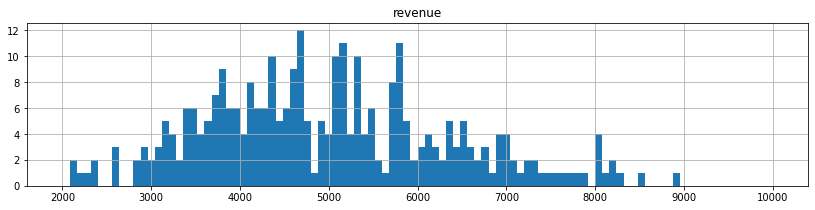

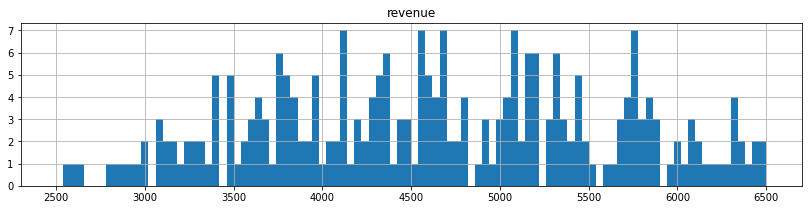

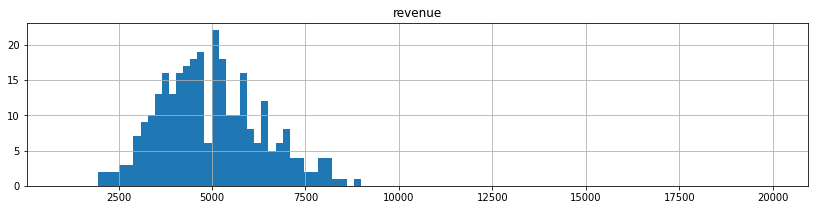

In [23]:
basket = 100
customers.hist('revenue', bins=basket, figsize=(14,3), range=(2000, 10000));
customers.hist('revenue', bins=basket, figsize=(14,3), range=(2500, 6500));
customers.hist('revenue', bins=basket, figsize=(14,3), range=(1000, 20000));

### Tenure

**Tenure calculation**

In [24]:
customers['last_order_date'] = pd.to_datetime(customers['last_order_date']).dt.normalize()
customers['first_order_date'] = pd.to_datetime(customers['first_order_date']).dt.normalize()

In [25]:
customers['last_order_date'] = pd.to_datetime(customers['last_order_date']).dt.normalize()
customers['first_order_date'] = pd.to_datetime(customers['first_order_date']).dt.normalize()

In [26]:
customers['tenure'] = round((customers['last_order_date'] 
                             - customers['first_order_date']) 
                            / np.timedelta64(1, 'D') ).astype(int)

In [27]:
customers.head().sort_values(by=['tenure'],ascending=False)

,user_id,revenue,shop_id,orders,items,first_order_date,last_order_date,tenure
34,734,8200,99,24,52,2017-03-01,2017-03-30,29
18,718,8952,97,28,58,2017-03-01,2017-03-29,28
87,787,8532,97,24,54,2017-03-02,2017-03-29,27
168,868,8317,93,27,52,2017-03-01,2017-03-27,26
147,847,8197,100,26,54,2017-03-01,2017-03-26,25


In [28]:
customers.describe()

,user_id,revenue,shop_id,orders,items,tenure
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,849.500000,4979.466667,94.080000,16.456667,32.826667,26.403333
std,86.746758,1369.722146,5.929372,3.991813,8.951184,2.257797
min,700.000000,2102.000000,65.000000,7.000000,14.000000,16.000000
25%,774.750000,3951.500000,91.000000,13.750000,26.000000,25.000000
50%,849.500000,4805.000000,96.000000,16.000000,32.000000,27.000000
75%,924.250000,5819.000000,99.000000,19.000000,39.000000,28.000000
max,999.000000,8952.000000,100.000000,28.000000,58.000000,29.000000


### Average Order Value

Calculate the **Average Order Value**

In [29]:
aov = customers['revenue'].describe().loc[['mean']] / customers['orders'].describe().loc[['mean']]
print('Average Order Value:', aov.round(1))

Average Order Value: mean    302.6
dtype: float64


In [30]:
# double check

In [31]:
def get_avg_order_value(revenue, orders):
    """Return the Average Order Value (AOV)
    
    Args:
        revenue (float): Total revenue
        orders (int): Total orders
    Return:
        avg_order_value (float): Average order value
    """
    
    return revenue / orders

In [32]:
avg_order_value = get_avg_order_value(customers['revenue'].sum(), orders['order_id'].nunique())
avg_order_value.round(1)

302.6

### Average Order Frequency

Calculate the **Average Order Frequency**

The average number of orders placed by each customer in the dataset. This is simply the total number of orders divided by the total number of customers.

In [33]:
aof = customers['orders'].describe().loc[['mean']]
print('Average Order Frequency:', aof.round(1))

Average Order Frequency: mean    16.5
Name: orders, dtype: float64


In [34]:
# double check

In [35]:
def get_avg_order_frequency(orders, customers): 
    """Return the Average Order Frequency (AOF)
    # double check
    Args:
        orders (int): Total orders
        customers (int): Total customers        
    Return:
        avg_order_frequency (float): Average Order Frequency (AOF)
    """
    
    return orders / customers

In [36]:
avg_order_frequency = round(get_avg_order_frequency(
    orders['order_id'].nunique(), orders['user_id'].nunique()),1)
avg_order_frequency

16.5

### Average Customer Value

Calculate the **Average Customer Value**

Average customer value shows us how much each customer spent on average and is simply the total revenue divided by the total number of customers.

In [37]:
acv = customers['revenue'].describe().loc[['mean']]
print(' Average Customer Value:', acv.round(1))

 Average Customer Value: mean    4979.5
Name: revenue, dtype: float64


In [38]:
# double check

In [39]:
def get_avg_customer_value(revenue, customers): 
    """Return the Average Customer Value. 
    
    Args:
        revenue (float): Total revenue
        customers (int): Total customers        
    Return:
        avg_customer_value (float): Average order value    
    """
    
    return revenue / customers

In [40]:
avg_customer_value = get_avg_customer_value(customers['revenue'].sum(), customers['user_id'].nunique())
avg_customer_value.round(1)

4979.5

### Average Customer Lifetime

Average customer lifetime is basically the sum of all customer lifetimes (the amount of time between the acquisition and attrition of each customer) divided by the total number of customers, so this is where it gets messy.

Most of the heuristics for calculating CLV require you to know the average customer lifetime and are designed for contractual businesses, not non-contractual business, like retail. In the latter, you are never sure whether a customer is still a customer, so this is never going to be accurate.

In [41]:
def get_avg_customer_lifetime(total_lifetimes, customers):
    """Return the Average Customer Lifetime. This is for *contractual* businesses only. 
    
    Args: 
        total_lifetimes (float): The sum of total customer lifetimes
        customers (int): Total customers
    Return:
        avg_customer_lifetime (float): The average lifetime of each customer in days
    """
    
    return total_lifetimes / customers

In the absence of the actual lifetime data, the closest thing we can use is their tenure. That’s flawed, of course, but we don’t have anything else to use. 

We get back a figure of **26.4 days**, which clearly isn’t going to be correct for this non-contractual business. You’d easily be able to calculate this in a contractual setting though.

In [42]:
acl = customers['tenure'].describe().loc[['mean']]
print('Average Customer Lifetime:', acl.round(1))

Average Customer Lifetime: mean    26.4
Name: tenure, dtype: float64


In [43]:
# double check

In [44]:
avg_customer_lifetime = get_avg_customer_lifetime(customers['tenure'].sum(), customers['user_id'].nunique())
avg_customer_lifetime.round(1)

26.4

### Customer Lifetime Value

We calculate a heuristic for the average “Customer Lifetime Value” by multiplying the average customer value by the average customer lifetime in years. That gives us a value of **360**.

Obviously, this is flawed because we don’t know the actual customer lifetime duration in a non-contractual business, and also because it’s an aggregate measure, not one specific to each customer… However, it’s the sort of thing you’ll often see tools mispresent as “CLV”, even though it’s not.

In [45]:
average_clv = (avg_customer_value * avg_customer_lifetime)/365
average_clv.round(1)

360.2

In [46]:
# double check

In [47]:
def get_avg_clv(avg_customer_value, avg_customer_lifetime):
    """Return the average Customer Lifetime Value. This is NOT CLV. 
    
    Args:
        avg_customer_value (float): Average customer value
        avg_customer_lifetime (float): Average customer lifetime in days
    Return:
        avg_clv (float): Average Customer Lifetime Value
    """
    
    return avg_customer_value * (avg_customer_lifetime / 365)

In [48]:
avg_clv = get_avg_clv(avg_customer_value, avg_customer_lifetime)
avg_clv.round(1)

360.2

In non-contractual retail settings it is not easy to calculate accurate CLV by using Heuristic metrics.

To calculate CLV correctly, instead we will use a more robust methodology such as the combination of BG/NBD with Gamma-Gamma.

# Gamma-Gamma & BG/NBD 

We can predict the following things by using these techniques:
- Which customer will do a purchase in the next period?
- Top N customers are expected to make the most purchases in the next period.
- What value will the customer create for our business?

**BG-NBD Formula**
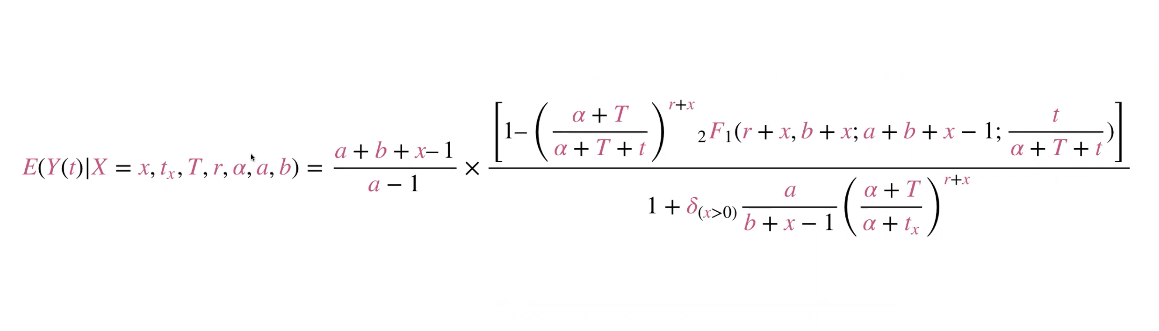

- `E` refers to the expected value
- `|` refers to that this probability is conditional (conditional expected number of transactions)
- `x` refers to frequency for each customer who purchased at least 2 times.
- `tx` refers to recency for each customer. In this case, we will assume the recency will be based on weeks. The time from the last purchasing date to the first purchasing date (weeks).
- `T` refers to the time from today’s date to the last purchasing date (weeks).
- `r,α` comes from the gamma distribution (buy process). Transaction rate of the mass.
- `a,b` comes from the beta distribution (till you die process). The dropout rate of the mass.
- `Y(t)` refers to the expected number of transactions for each customer.

**Gamma-Gamma Submodel Formula**
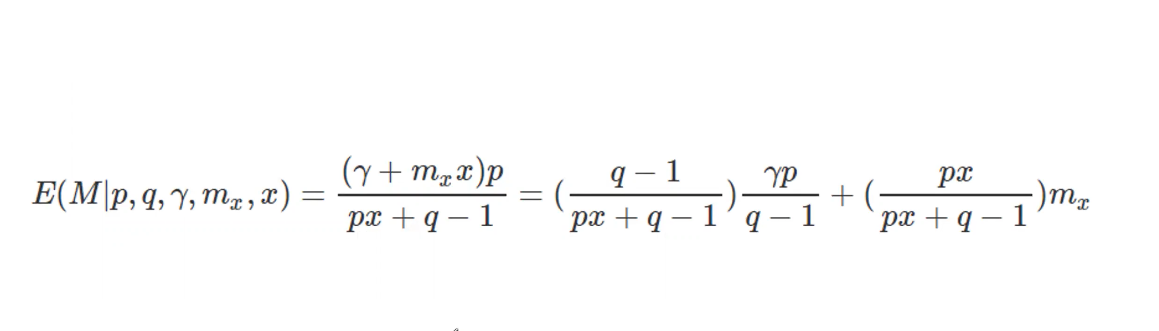

- `E` refers to the expected value
- `x` refers to frequency for each customer
- `mx` refers to the monetary for each customer
- `M` refers to the expected value of transactions (expected average profit)
- `p,q,γ` comes from the gamma distribution

## Dataset

**Preparing Dataset for Calculating CLV**

Our dataset includes orders from time period 2017-03-01 - 2017-03-30.

We create a dummy date and calculate columns for the statistical models.

In [49]:
today_date = dt.datetime(2017, 4, 1)

In [50]:
cltv = orders.groupby('user_id').agg({
    'order_date': [
        lambda x: (x.max() - x.min()).days,  # recency
        lambda x: (today_date - x.min()).days  # T
    ],
    'order_id': lambda x: x.nunique(),  # frequency
    'revenue': lambda x: x.sum()  # monetary
})

In [51]:
cltv.head()

order_date            order_id  revenue
        <lambda_0> <lambda_1> <lambda> <lambda>
user_id                                        
700             23         25       16     4790
701             26         31       13     5162
702             28         31       13     5286
703             27         30       16     6091
704             24         27       14     3854

In [52]:
# repairing dataset's columns due to the 2 lambda function in the order_date 
cltv.columns = cltv.columns.droplevel(0)

cltv.columns = ['recency', 'T', 'frequency', 'monetary']
cltv.head()

,recency,T,frequency,monetary
user_id,,,,
700,23,25,16,4790
701,26,31,13,5162
702,28,31,13,5286
703,27,30,16,6091
704,24,27,14,3854


## Average earning per transaction

Calculation of the average earning per transaction.

In [53]:
cltv = cltv[cltv['monetary'] > 0]
cltv['monetary'] = cltv['monetary'] / cltv['frequency']
cltv.head()

,recency,T,frequency,monetary
user_id,,,,
700,23,25,16,299.375000
701,26,31,13,397.076923
702,28,31,13,406.615385
703,27,30,16,380.687500
704,24,27,14,275.285714


Transforming days to weeks for the NG-NBD model.

In [54]:
cltv['recency'] = cltv['recency'] / 7
cltv['T'] = cltv['T'] / 7

And I’m filtering out frequency values greater than 1.

In [55]:
cltv = cltv[(cltv['frequency'] > 1)]

## BG-NBD Model

Creating BG-NBD Model by using `BetaGeoFitter` from `lifetimes package`. 

Creating an instance and fitting it by using frequency, recency and T values.

BG-NBD model works week based, therefore we need to pass the time argument based on weeks.

In [56]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv['frequency'], cltv['recency'], cltv['T'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<lifetimes.BetaGeoFitter: fitted with 300 subjects, a: 0.00, alpha: 2.61, b: 0.00, r: 10.08>

Let's predict some expected values.

### Most Orders in a Week

- Top 10 customers expected to make the most purchases in a week

In [57]:
bgf.conditional_expected_number_of_purchases_up_to_time(1, # week
                                                        cltv['frequency'],
                                                        cltv['recency'],
                                                        cltv['T']).sort_values(ascending=False).head(10).round(1)

user_id
718    5.4
868    5.3
791    5.1
847    5.1
786    5.1
922    5.0
727    5.0
787    4.9
793    4.9
848    4.9
dtype: float64

### Most Orders in a Month

- Top 10 customers expected to make the most purchases in a month

In [58]:
bgf.conditional_expected_number_of_purchases_up_to_time(4, 
                                                 # 4 weeks = 1 month
                                                        cltv['frequency'],
                                                        cltv['recency'],
                                                        cltv['T']).sort_values(ascending=False).head(10).round(1)

user_id
718    21.7
868    21.1
791    20.5
847    20.5
786    20.4
922    20.0
727    20.0
787    19.8
793    19.8
848    19.6
dtype: float64

### Most Orders in 6 Months

- Top 10 customers expected to make the most purchases in next 6 months

In [59]:
bgf.conditional_expected_number_of_purchases_up_to_time(4 * 6, 
                                           # weeks * count = months
                                                        cltv['frequency'],
                                                        cltv['recency'],
                                                        cltv['T']).sort_values(ascending=False).head(10).round(1)

user_id
718    129.9
868    126.5
791    123.1
847    123.1
786    122.2
922    120.2
727    119.7
787    118.7
793    118.7
848    117.7
dtype: float64

### Total Orders in 6 Months

- The count of total transactions expected in next 6 months

In [60]:
bgf.conditional_expected_number_of_purchases_up_to_time(4 * 6,
                                                        cltv['frequency'],
                                                        cltv['recency'],
                                                        cltv['T']).sum().round()

27865.0

## Gamma-Gamma

Creating Gamma-Gamma Submodel by using `GammaGammaFitter` from `lifetimes package`. 

Creating an instance and fitting it by using frequency and monetary values.

In [61]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(cltv['frequency'], cltv['monetary'])

<lifetimes.GammaGammaFitter: fitted with 300 subjects, p: 3.85, q: 0.34, v: 3.84>

###  Top 10 by Average Transaction Value

- The top 10 most valuable customers by average transaction value

In [62]:
ggf.conditional_expected_average_profit(cltv['frequency'],
                               cltv['monetary']).sort_values(ascending=False).head(10).round(1)

user_id
754    464.7
926    427.3
828    425.0
747    419.7
702    412.3
701    402.6
830    396.0
756    390.1
833    387.9
739    387.4
dtype: float64

# CLV Prediction: BG-NBD & Gamma-Gamma

Predicting CLV by using BG/NBD and Gamma-Gamma models

In [63]:
# The customers' lifetime values expected to in the next 3 months
cltv['cltv_pred_3_months'] = ggf.customer_lifetime_value(bgf,
                                   cltv['frequency'],
                                   cltv['recency'],
                                   cltv['T'],
                                   cltv['monetary'],
                                   time=3,  # 3 months
                                   freq="W",  # frequency information of T. We set week by using 'W'
                                   discount_rate=0.01)
cltv

,recency,T,frequency,monetary,cltv_pred_3_months
user_id,,,,,
700,3.285714,3.571429,16,299.375000,16341.532688
701,3.714286,4.428571,13,397.076923,16885.363637
702,4.000000,4.428571,13,406.615385,17290.677275
703,3.857143,4.285714,16,380.687500,18622.988495
704,3.428571,3.857143,14,275.285714,13284.059147
...,...,...,...,...,...
995,3.571429,4.142857,15,354.400000,17039.080622
996,4.000000,4.428571,21,252.952381,14411.191562
997,3.428571,4.285714,12,292.583333,12167.329858


## CLV Customer Segmentation

We can segment customers by using their CLV values.

In [64]:
cltv['segment'] = pd.qcut(cltv['cltv_pred_3_months'],3,['C','B','A'])

cltv

,recency,T,frequency,monetary,cltv_pred_3_months,segment
user_id,,,,,,
700,3.285714,3.571429,16,299.375000,16341.532688,B
701,3.714286,4.428571,13,397.076923,16885.363637,A
702,4.000000,4.428571,13,406.615385,17290.677275,A
703,3.857143,4.285714,16,380.687500,18622.988495,A
704,3.428571,3.857143,14,275.285714,13284.059147,C
...,...,...,...,...,...,...
995,3.571429,4.142857,15,354.400000,17039.080622,A
996,4.000000,4.428571,21,252.952381,14411.191562,B
997,3.428571,4.285714,12,292.583333,12167.329858,C


In [65]:
cltv_a = cltv.loc[cltv['segment'] == "A"]
cltv_b = cltv.loc[cltv['segment'] == "B"]
cltv_c = cltv.loc[cltv['segment'] == "C"]

In [66]:
cltv_a.describe()

,recency,T,frequency,monetary,cltv_pred_3_months
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.844286,4.260000,19.750000,330.033999,18371.006885
std,0.267142,0.228265,3.430037,33.369362,1658.232438
min,2.857143,3.142857,11.000000,258.307692,16451.466210
25%,3.714286,4.142857,17.000000,308.779221,16984.464196
50%,3.857143,4.285714,20.000000,324.656250,17888.491012
75%,4.000000,4.428571,22.000000,348.108696,19649.612583
max,4.142857,4.428571,28.000000,458.785714,22793.892585


## Average CLV per Segment

Let's have a look on the average Customer Lifetime Value (3 months) per segment (A,B,C).

In [67]:
# Mean CLTV: 3m prediction
a_cltv_3m = cltv_a['cltv_pred_3_months'].describe().loc[['mean']]
b_cltv_3m = cltv_b['cltv_pred_3_months'].describe().loc[['mean']]
c_cltv_3m = cltv_c['cltv_pred_3_months'].describe().loc[['mean']]

In [68]:
print('Customers per segment:', len(cltv_a), len(cltv_b), len(cltv_c))
print()
print('Average Customer Lifetime Value in segment A:', a_cltv_3m.round(1))
print()
print('Average Customer Lifetime Value in segment B:', b_cltv_3m.round(1))
print()
print('Average Customer Lifetime Value in segment C:', c_cltv_3m.round(1))

Customers per segment: 100 100 100

Average Customer Lifetime Value in segment A: mean    18371.0
Name: cltv_pred_3_months, dtype: float64

Average Customer Lifetime Value in segment B: mean    15083.4
Name: cltv_pred_3_months, dtype: float64

Average Customer Lifetime Value in segment C: mean    11950.1
Name: cltv_pred_3_months, dtype: float64


As we can see above, there is a clear difference in average customer lifetime value per customer in each segment.

In [69]:
print(cltv_a.sort_values(by='cltv_pred_3_months', ascending=False).tail())
print(cltv_b.sort_values(by='cltv_pred_3_months', ascending=False).head())
print('___________________')
print(cltv_b.sort_values(by='cltv_pred_3_months', ascending=False).tail())
print(cltv_c.sort_values(by='cltv_pred_3_months', ascending=False).head())

          recency         T  frequency    monetary  cltv_pred_3_months segment
user_id                                                                       
744      3.714286  4.285714         17  325.764706        16537.728586       A
883      4.000000  4.428571         19  309.421053        16507.151425       A
974      3.857143  4.285714         18  313.333333        16484.468654       A
992      4.000000  4.285714         20  292.500000        16468.171075       A
720      4.000000  4.428571         15  356.666667        16451.466210       A
          recency         T  frequency    monetary  cltv_pred_3_months segment
user_id                                                                       
910      4.000000  4.428571         14  370.285714        16412.596643       B
841      3.857143  4.142857         20  285.250000        16400.228900       B
858      3.714286  4.428571         19  307.368421        16397.718058       B
940      4.000000  4.285714         17  322.882353  

All 300 customers are divided correctly to their segments based on their CLV for next 3 months.

<AxesSubplot:xlabel='cltv_pred_3_months'>

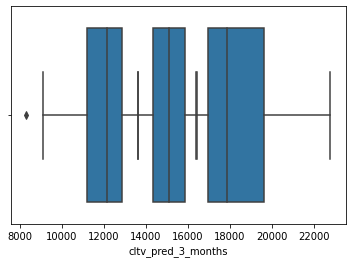

In [70]:
sns.boxplot(cltv_a['cltv_pred_3_months'])
sns.boxplot(cltv_b['cltv_pred_3_months'])
sns.boxplot(cltv_c['cltv_pred_3_months'])

In [71]:
cltv_a_sum = cltv_a.sort_values(by='cltv_pred_3_months', ascending=False)
cltv_b_sum = cltv_b.sort_values(by='cltv_pred_3_months', ascending=False)
cltv_c_sum = cltv_c.sort_values(by='cltv_pred_3_months', ascending=False)

#cltv_sum = cltv_a_sum + cltv_b_sum + cltv_c_sum
print('Segment A - CLTV 3 months',cltv_a_sum['cltv_pred_3_months'].sum().round())
print('Segment B - CLTV 3 months',cltv_b_sum['cltv_pred_3_months'].sum().round())
print('Segment C - CLTV 3 months',cltv_c_sum['cltv_pred_3_months'].sum().round())


Segment A - CLTV 3 months 1837101.0
Segment B - CLTV 3 months 1508343.0
Segment C - CLTV 3 months 1195009.0


'Segments A, B, C below'

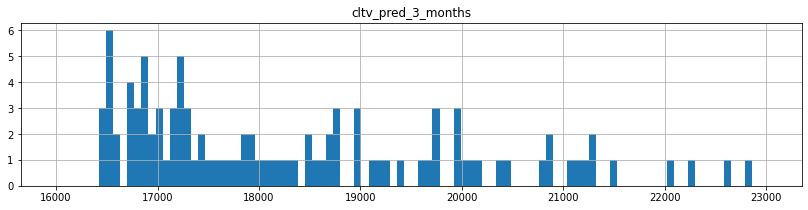

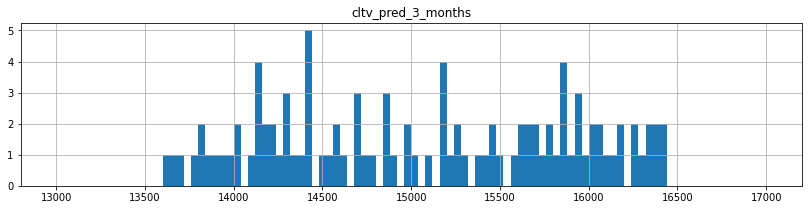

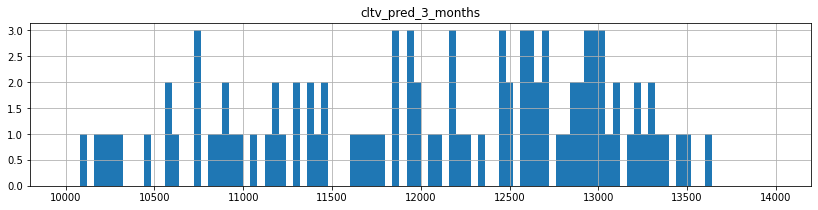

In [72]:
basket = 100
display('Segments A, B, C below')
cltv_a.hist('cltv_pred_3_months', bins=basket, figsize=(14,3), range=(16000, 23000));
cltv_b.hist('cltv_pred_3_months', bins=basket, figsize=(14,3), range=(13000, 17000));
cltv_c.hist('cltv_pred_3_months', bins=basket, figsize=(14,3), range=(10000, 14000));

In [73]:
cltv.head()

,recency,T,frequency,monetary,cltv_pred_3_months,segment
user_id,,,,,,
700,3.285714,3.571429,16,299.375000,16341.532688,B
701,3.714286,4.428571,13,397.076923,16885.363637,A
702,4.000000,4.428571,13,406.615385,17290.677275,A
703,3.857143,4.285714,16,380.687500,18622.988495,A
704,3.428571,3.857143,14,275.285714,13284.059147,C


# RFM Segmentation

RFM segmentation is a great method to identify groups of customers for special treatment.

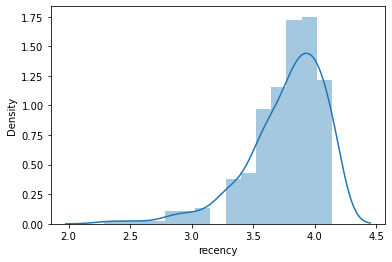

In [74]:
# recency plot
x = cltv['recency']
ax = sns.distplot(x)

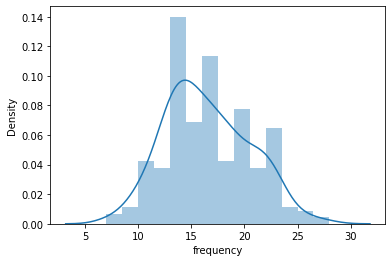

In [75]:
# frequency plot
x = cltv['frequency']
ax = sns.distplot(x)

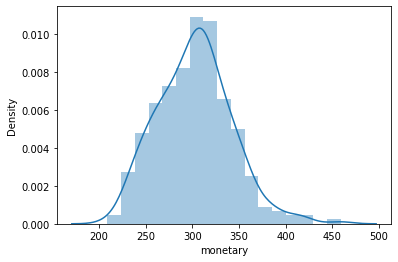

In [76]:
# monetary plot
x = cltv['monetary']
ax = sns.distplot(x)

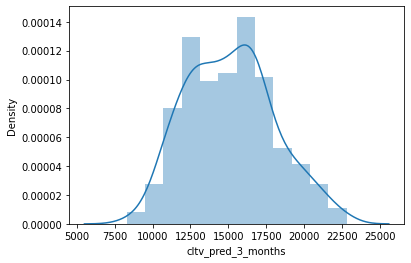

In [77]:
x = cltv['cltv_pred_3_months']
ax = sns.distplot(x)

In [78]:
# Split the data into 4 segments based on quatile

quantils = cltv.quantile(q=[0.25, 0.5, 0.75])
quantils = quantils.to_dict()
quantils

{'recency': {0.25: 3.5714285714285716, 0.5: 3.857142857142857, 0.75: 4.0},
 'T': {0.25: 4.142857142857143,
  0.5: 4.285714285714286,
  0.75: 4.428571428571429},
 'frequency': {0.25: 13.75, 0.5: 16.0, 0.75: 19.0},
 'monetary': {0.25: 275.2527472527472,
  0.5: 303.92105263157896,
  0.75: 325.75367647058823},
 'cltv_pred_3_months': {0.25: 12880.548190491474,
  0.5: 15126.825597381434,
  0.75: 16969.004837382345}}

In [79]:
# Functions to create R, F, M Segments
# 3 parameters- x=my variable, d=dictionary, p = percentile(quantile value)
# RScores = Recency Score
# FScores = Frequency Score & Monetary Score

def RScores(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FScores(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


In [80]:
cltv['R'] = cltv['recency'].apply(RScores, args=('recency',quantils))
cltv['F'] = cltv['frequency'].apply(FScores, args=('frequency',quantils))
cltv['M'] = cltv['monetary'].apply(FScores, args=('monetary',quantils))
cltv.head()

,recency,T,frequency,monetary,cltv_pred_3_months,segment,R,F,M
user_id,,,,,,,,,
700,3.285714,3.571429,16,299.375000,16341.532688,B,1,3,3
701,3.714286,4.428571,13,397.076923,16885.363637,A,2,4,1
702,4.000000,4.428571,13,406.615385,17290.677275,A,3,4,1
703,3.857143,4.285714,16,380.687500,18622.988495,A,2,3,1
704,3.428571,3.857143,14,275.285714,13284.059147,C,1,3,3


In [81]:
cltv.columns

Index(['recency', 'T', 'frequency', 'monetary', 'cltv_pred_3_months',
       'segment', 'R', 'F', 'M'],
      dtype='object')

In [82]:
cltv['RFM_group'] = cltv.R.map(str)+cltv.F.map(str)+cltv.M.map(str)
cltv['RFM_score'] = cltv[['R','F','M']].sum(axis=1)

In [83]:
cltv.head()

,recency,T,frequency,monetary,cltv_pred_3_months,segment,R,F,M,RFM_group,RFM_score
user_id,,,,,,,,,,,
700,3.285714,3.571429,16,299.375000,16341.532688,B,1,3,3,133,7
701,3.714286,4.428571,13,397.076923,16885.363637,A,2,4,1,241,7
702,4.000000,4.428571,13,406.615385,17290.677275,A,3,4,1,341,8
703,3.857143,4.285714,16,380.687500,18622.988495,A,2,3,1,231,6
704,3.428571,3.857143,14,275.285714,13284.059147,C,1,3,3,133,7


## RFM Scores & Labels

In [84]:
# Define rfm_level function
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'
#Create RFM label for customer
cltv['RFM_label'] = cltv.apply(RFM_label, axis=1)
cltv.head()

,recency,T,frequency,monetary,cltv_pred_3_months,segment,R,F,M,RFM_group,RFM_score,RFM_label
user_id,,,,,,,,,,,,
700,3.285714,3.571429,16,299.375000,16341.532688,B,1,3,3,133,7,About To Sleep
701,3.714286,4.428571,13,397.076923,16885.363637,A,2,4,1,241,7,About To Sleep
702,4.000000,4.428571,13,406.615385,17290.677275,A,3,4,1,341,8,Can’t Lose Them
703,3.857143,4.285714,16,380.687500,18622.988495,A,2,3,1,231,6,Promising
704,3.428571,3.857143,14,275.285714,13284.059147,C,1,3,3,133,7,About To Sleep


## Customers per Segment
How many customers do we have in each segment?

In [85]:
# Calculate average values for each RFM_Level, and return a size of each segment 
cltv_desc = cltv.groupby('RFM_label').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(cltv_desc)

                   recency frequency monetary      
                      mean      mean     mean count
RFM_label                                          
About To Sleep         3.8      16.6    308.7    76
Can’t Lose Them        3.8      16.1    284.5    55
Champions              3.6      22.0    364.2     1
Hibernating            3.8      14.4    281.2    36
Lost                   4.0      13.2    262.5    35
Loyal Customers        3.6      21.3    338.8    13
Potential Loyalist     3.7      19.0    326.0    34
Promising              3.7      17.3    330.2    50


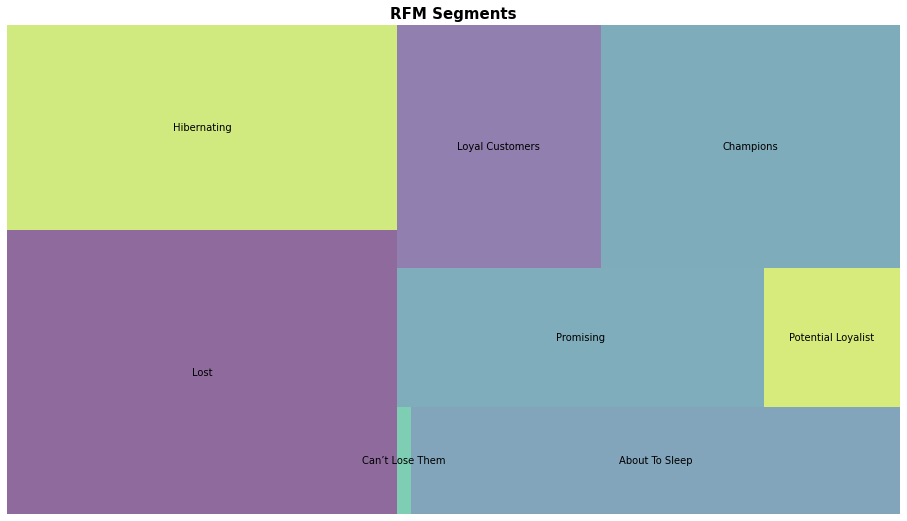

In [86]:
cltv_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=cltv_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM Segments",fontsize=15,fontweight="bold")
plt.axis('off')
plt.show()

Now that we've identified our customer categories, we can decide how to approach or deal with each customer.

- Champions : Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.
- Loyal Customer : Upsell higher value products. Ask for reviews.
- Potential Loyalist : Offer membership / loyalty program. Keep them engaged. Offer personalised recommendations.
- Promising : Offer coupons. Bring them back to the platform and keep them engaged. Offer personalised recommendations.
- About to Sleep : Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalisation.
- Can't Lose Them : Provide helpful resources on the site. Send personalised emails.
- Hibernating : Make subject lines of emails very personalised. Revive their interest by a specific discount on a specific product.
- Lost : Revive interest with reach out campaign. Ignore otherwise.

# CLV + RFM Customers

In order to identify the best approach for customers that bring most value in next 3 months, let's have a look on customers with the highest CLV (3 months) in Segment A and check their RFM segmentation.

In [87]:
cltv.head()

,recency,T,frequency,monetary,cltv_pred_3_months,segment,R,F,M,RFM_group,RFM_score,RFM_label
user_id,,,,,,,,,,,,
700,3.285714,3.571429,16,299.375000,16341.532688,B,1,3,3,133,7,About To Sleep
701,3.714286,4.428571,13,397.076923,16885.363637,A,2,4,1,241,7,About To Sleep
702,4.000000,4.428571,13,406.615385,17290.677275,A,3,4,1,341,8,Can’t Lose Them
703,3.857143,4.285714,16,380.687500,18622.988495,A,2,3,1,231,6,Promising
704,3.428571,3.857143,14,275.285714,13284.059147,C,1,3,3,133,7,About To Sleep


## Segment A & RFM

Segment A:

In [88]:
a_cltv_rfm = cltv.loc[cltv['segment'] == "A"]

In [89]:
# Calculate average values for each RFM_Level, and return a size of each segment 
a_cltv_rfm_desc = a_cltv_rfm.groupby('RFM_label').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print('Segment A & RFM:')
print(a_cltv_rfm_desc)

Segment A & RFM:
                   recency frequency monetary      
                      mean      mean     mean count
RFM_label                                          
About To Sleep         4.0      18.9    323.8    24
Can’t Lose Them        4.1      20.9    308.5     7
Champions              3.6      22.0    364.2     1
Hibernating            4.1      26.0    258.3     1
Loyal Customers        3.6      21.3    338.8    13
Potential Loyalist     3.7      19.9    328.2    26
Promising              3.8      19.0    339.7    28


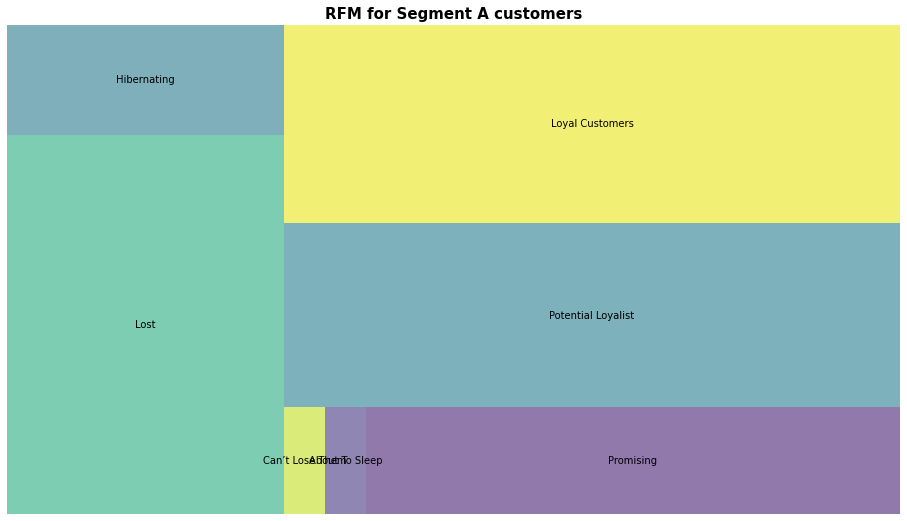

In [90]:
a_cltv_rfm_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=a_cltv_rfm_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM for Segment A customers",fontsize=15,fontweight="bold")
plt.axis('off')
plt.show()

## Segment B & RFM

Segment B:

In [91]:
b_cltv_rfm = cltv.loc[cltv['segment'] == "B"]

In [92]:
# Calculate average values for each RFM_Level, and return a size of each segment 
b_cltv_rfm_desc = b_cltv_rfm.groupby('RFM_label').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print('Segment B & RFM:')
print(b_cltv_rfm_desc)

Segment B & RFM:
                   recency frequency monetary      
                      mean      mean     mean count
RFM_label                                          
About To Sleep         3.7      16.2    309.4    38
Can’t Lose Them        3.9      17.4    287.8    24
Hibernating            4.1      15.6    310.5     9
Lost                   4.1      19.0    260.5     1
Potential Loyalist     3.5      16.1    319.0     8
Promising              3.5      15.6    315.1    20


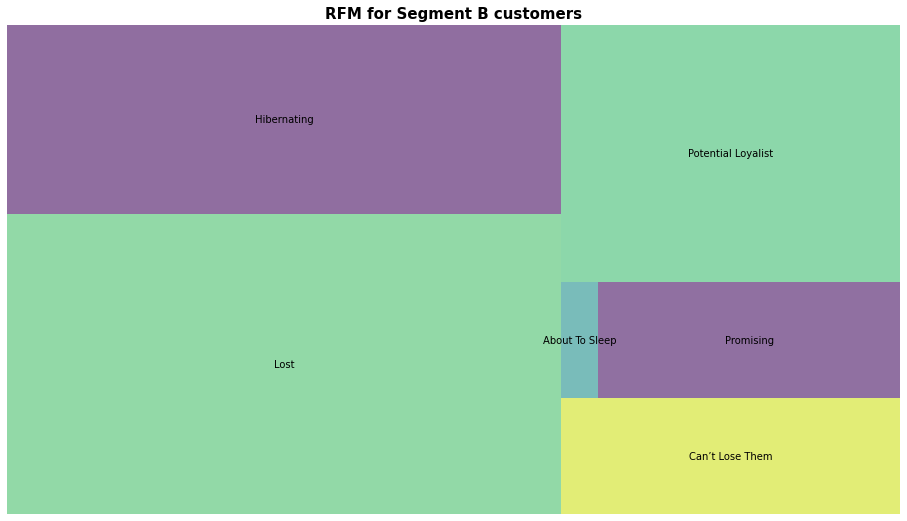

In [93]:
b_cltv_rfm_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=b_cltv_rfm_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM for Segment B customers",fontsize=15,fontweight="bold")
plt.axis('off')
plt.show()

## Segment C & RFM

Segment C:

In [94]:
c_cltv_rfm = cltv.loc[cltv['segment'] == "C"]

In [95]:
# Calculate average values for each RFM_Level, and return a size of each segment 
c_cltv_rfm_desc = c_cltv_rfm.groupby('RFM_label').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print('Segment C & RFM:')
print(c_cltv_rfm_desc)

Segment C & RFM:
                recency frequency monetary      
                   mean      mean     mean count
RFM_label                                       
About To Sleep      3.5      14.1    280.9    14
Can’t Lose Them     3.5      13.4    274.3    24
Hibernating         3.7      13.5    271.9    26
Lost                4.0      13.1    262.6    34
Promising           2.9       8.5    348.3     2


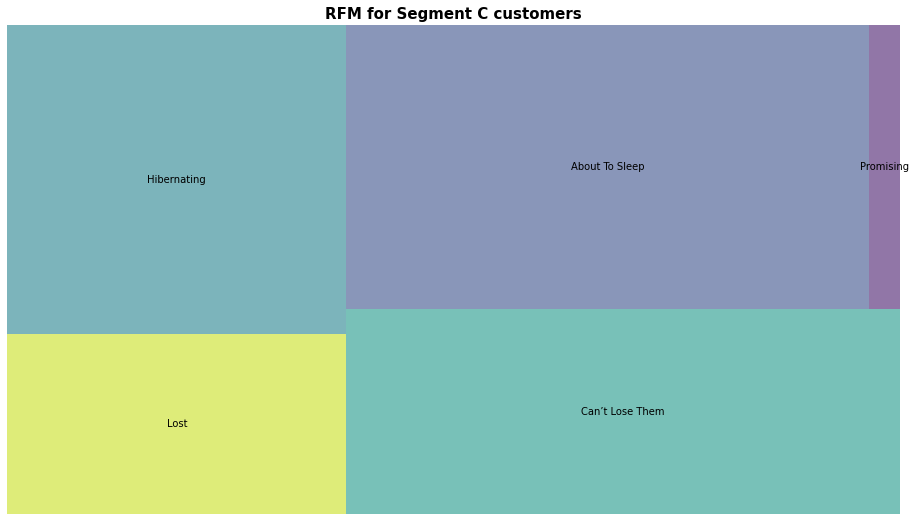

In [96]:
c_cltv_rfm_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=c_cltv_rfm_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM for Segment C customers",fontsize=15,fontweight="bold")
plt.axis('off')
plt.show()

## Crosstab Results

In [97]:
ct = (pd.crosstab(cltv.segment,cltv.RFM_label, normalize='index')\
    .round(4)*100).sort_values('segment', ascending=False)

ct

RFM_label,About To Sleep,Can’t Lose Them,Champions,Hibernating,Lost,Loyal Customers,Potential Loyalist,Promising
segment,,,,,,,,
A,24.0,7.0,1.0,1.0,0.0,13.0,26.0,28.0
B,38.0,24.0,0.0,9.0,1.0,0.0,8.0,20.0
C,14.0,24.0,0.0,26.0,34.0,0.0,0.0,2.0


## Recommendations

### Champions

1 person (Segment A) - customer should be rewarded. Can be early adopter of new products. Will promote your brand. Most likely to send referrals.

In [98]:
champs = cltv[cltv.RFM_label == 'Champions']
champs.reset_index(inplace=True)
champs.describe()

,user_id,recency,T,frequency,monetary,cltv_pred_3_months,R,F,M,RFM_score
count,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0
mean,934.0,3.571429,4.0,22.0,364.227273,22793.892585,1.0,1.0,1.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,934.0,3.571429,4.0,22.0,364.227273,22793.892585,1.0,1.0,1.0,3.0
25%,934.0,3.571429,4.0,22.0,364.227273,22793.892585,1.0,1.0,1.0,3.0
50%,934.0,3.571429,4.0,22.0,364.227273,22793.892585,1.0,1.0,1.0,3.0
75%,934.0,3.571429,4.0,22.0,364.227273,22793.892585,1.0,1.0,1.0,3.0
max,934.0,3.571429,4.0,22.0,364.227273,22793.892585,1.0,1.0,1.0,3.0


### Loyal Customer 

13 customers (Segment A)

Upsell higher value products. Ask for reviews.

In [99]:
loyal = cltv[cltv.RFM_label == 'Loyal Customers']
loyal.reset_index(inplace=True)
#loyal.describe()

### Potential Loyalist

26 (Segment A) + 8 (Segment B)

Offer membership / loyalty program. Keep them engaged. Offer personalised recommendations.

In [100]:
pot_loyal = cltv[cltv.RFM_label == 'Potential Loyalist']
pot_loyal.reset_index(inplace=True)
#pot_loyal.describe()

### Promising

28 (Segment A) + 20 (Segment B) + 2 (Segment C)

Offer coupons. Bring them back to the platform and keep them engaged. Offer personalised recommendations.

In [101]:
promising = cltv[cltv.RFM_label == 'Promising']
promising.reset_index(inplace=True)
#promising.describe()

### About To Sleep 

24 (Segment A) + 38 (Segment B) + 14 (Segment C)

Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalisation.

In [102]:
about2_sleep = cltv[cltv.RFM_label == 'About To Sleep']
about2_sleep.reset_index(inplace=True)
#about2_sleep.describe()

### Can't Lose Them 

7 (Segment A) + 24 (Segment B) + 24 (Segment C)

Provide helpful resources on the site. Send personalised emails.

In [103]:
cant_loose = cltv[cltv.RFM_label == 'Can’t Lose Them']
cant_loose.reset_index(inplace=True)
#cant_loose.describe()

### Hibernating 

1 (Segment A) + 9 (Segment B) + 26 (Segment C)

Make subject lines of emails very personalised. Revive their interest by a specific discount on a specific product.

In [104]:
hibernating = cltv[cltv.RFM_label == 'Hibernating']
hibernating.reset_index(inplace=True)
#hibernating.describe()

### Lost 

1 (Segment B) + 34 (Segment C)

Revive interest with reach out campaign. Ignore otherwise.

In [105]:
lost = cltv[cltv.RFM_label == 'Lost']
lost.reset_index(inplace=True)
#lost.describe()

# Possible Revenue Leak

Let's calculate the possible revenue leak in three months - based on CLV, and RFM Crosstab results

- **Safe Group**: Champions, Loyal Customers, Potential Loyalist, Promising
- **Risk Group**: About To Sleep, Can't Lose Them, Hibernating, Lost

**SAFE**

In [106]:
champs_cltv = champs['cltv_pred_3_months'].describe().loc[['mean']] * len(champs['cltv_pred_3_months'])
champs_cltv = champs_cltv.round()
champs_cltv_num = len(champs['cltv_pred_3_months'])

In [107]:
loyal_cltv = loyal['cltv_pred_3_months'].describe().loc[['mean']] * len(loyal['cltv_pred_3_months'])
loyal_cltv = loyal_cltv.round()
loyal_cltv_num = len(loyal['cltv_pred_3_months'])

In [108]:
pot_loyal_cltv = pot_loyal['cltv_pred_3_months'].describe().loc[['mean']] * len(pot_loyal['cltv_pred_3_months'])
pot_loyal_cltv = pot_loyal_cltv.round()
pot_loyal_cltv_num = len(pot_loyal['cltv_pred_3_months'])

In [109]:
promising_cltv = promising['cltv_pred_3_months'].describe().loc[['mean']] * len(promising['cltv_pred_3_months'])
promising_cltv = promising_cltv.round()
promising_cltv_num = len(promising['cltv_pred_3_months'])

In [110]:
safe_cltv_3m = champs_cltv + loyal_cltv + pot_loyal_cltv + promising_cltv
safe_cust_num = champs_cltv_num + loyal_cltv_num + pot_loyal_cltv_num + promising_cltv_num
print(safe_cltv_3m)
print()
print(safe_cust_num, 'customers are in the Safe group')

mean    1743175.0
Name: cltv_pred_3_months, dtype: float64

98 customers are in the Safe group


**Almost 1.7 million of total CLV is in the SAFE group.**

**RISK**

In [111]:
about2_sleep_cltv = about2_sleep['cltv_pred_3_months'].describe().loc[['mean']] * len(about2_sleep['cltv_pred_3_months'])
about2_sleep_cltv = about2_sleep_cltv.round()

In [112]:
cant_loose_cltv = cant_loose['cltv_pred_3_months'].describe().loc[['mean']] * len(cant_loose['cltv_pred_3_months'])
cant_loose_cltv = cant_loose_cltv.round()

In [113]:
hibernating_cltv = hibernating['cltv_pred_3_months'].describe().loc[['mean']] * len(hibernating['cltv_pred_3_months'])
hibernating_cltv = hibernating_cltv.round()

In [114]:
lost_cltv = lost['cltv_pred_3_months'].describe().loc[['mean']] * len(lost['cltv_pred_3_months'])
lost_cltv = lost_cltv.round()

Calculating the revenue leak.

In [115]:
risk_cltv_3m = about2_sleep_cltv + cant_loose_cltv + hibernating_cltv + lost_cltv
print(risk_cltv_3m)
print()
print(300-safe_cust_num, 'customers are in the RISK group')
print('Percent of customers in the RISK group:', (202/300)*100)

mean    2797277.0
Name: cltv_pred_3_months, dtype: float64

202 customers are in the RISK group
Percent of customers in the RISK group: 67.33333333333333


**2.8 million of total CLV (3 months) is in the RISK group.**

In [116]:
# Percentage
risk_percentage = (risk_cltv_3m / (safe_cltv_3m + risk_cltv_3m)) * 100
risk_percentage

mean    61.607897
Name: cltv_pred_3_months, dtype: float64

## Summary

It is highly important to utilize the results of this project due to the high rate of customers in the RISK group:
- Over 67% of customers (**202** of 300) are in the RISK groups
- 61.6% of total CLV (**2.8 million** of total 4.5M) is a possible revenue leak during the next three months.

# Export

Saving results to excel file `Results` (to group specific worksheets).

In [117]:
with pd.ExcelWriter('results.xlsx') as writer:
    champs.to_excel(writer, sheet_name='Champions')
    loyal.to_excel(writer, sheet_name='Loyal Customers')
    pot_loyal.to_excel(writer, sheet_name='Potential Loyalist')
    promising.to_excel(writer, sheet_name='Promising')
    about2_sleep.to_excel(writer, sheet_name='About To Sleep')
    cant_loose.to_excel(writer, sheet_name='Cant Loose Them')
    hibernating.to_excel(writer, sheet_name='Hibernating')
    lost.to_excel(writer, sheet_name='Lost')

___
<p><img style="display: block; margin-left: auto; margin-right: auto;" src="https://avatars.githubusercontent.com/u/99581812?v=4" alt="" width="89" height="89" /></p>
<p style="text-align: center;">Connect with me:</p>
<p style="text-align: center;"><a href="https://t.me/gavrilov_se" target="blank"><img src="https://www.svgrepo.com/show/349527/telegram.svg" alt="Telegram_Alexander_Gavrilov_Data_Scientist" width="40" height="30" align="center" /></a></p>
<p style="text-align: center;"><a href="mailto:alexander@gavrilov.se" target="blank"><img src="https://www.clipartmax.com/png/full/91-913506_computer-icons-email-address-clip-art-icon-email-vector-png.png" alt="Email_Alexander_Gavrilov_Data_Scientist" width="30" height="30" align="center" /></a>&nbsp;</p>